In [1]:
import tensorflow as tf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

column_names = ['负荷', 'A、B层摆动喷嘴阀位 ', 'C、D层摆动喷嘴阀位  ', 'E、F层摆动喷嘴阀位 ', '空预器入口烟气温度1',
       'SCR IN O2 ', 'SOFA摆角', 'CCOFAI', 'CCOFAII', 'SOFAI', 'SOFAII',
       'SOFAIII', 'SOFAIV', 'SOFAV', 'SOFAVI', '水分', '热值', '灰分', 'A磨煤量',
       'B磨煤量', 'C磨煤量', 'D磨煤量', 'E磨煤量', 'F磨煤量', 'A磨一次风量', 'B磨一次风量', 'C磨一次风量',
       'D磨一次风量', 'E磨一次风量', 'F磨一次风量', '风箱差压', '主给水', '总燃料量', '磨煤机A出口风粉温度',
       '磨煤机B出口风粉温度', '磨煤机C出口风粉温度', '磨煤机D出口风粉温度', '磨煤机E出口风粉温度', '磨煤机F出口风粉温度',
       '飞灰含碳量']
dataset_path = "csv/fhwhole1.csv"
raw_dataset = pd.read_csv(dataset_path,
                      na_values = "?", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.head()

,负荷,A、B层摆动喷嘴阀位,C、D层摆动喷嘴阀位,E、F层摆动喷嘴阀位,空预器入口烟气温度1,SCR IN O2,SOFA摆角,CCOFAI,CCOFAII,SOFAI,...,风箱差压,主给水,总燃料量,磨煤机A出口风粉温度,磨煤机B出口风粉温度,磨煤机C出口风粉温度,磨煤机D出口风粉温度,磨煤机E出口风粉温度,磨煤机F出口风粉温度,飞灰含碳量
0,628.49,65.8850,67.0325,64.8300,346.115,2.74,64.4550,60.5375,60.2125,100.5700,...,0.32,1783.86,301.53,56.95,64.44,63.40,67.17,72.57,63.45,1.750
1,551.11,88.2950,89.0300,85.3925,324.620,3.64,85.0150,60.2275,60.2175,100.4100,...,0.10,1537.01,276.26,35.09,51.02,58.64,57.76,81.34,56.15,1.595
2,469.09,92.9900,93.8275,93.0425,335.745,3.39,92.8150,60.1450,60.7950,100.5775,...,0.14,1345.16,270.96,53.21,70.37,60.10,60.07,60.27,58.69,1.790
3,642.87,93.0975,93.9675,92.6425,337.460,3.14,92.6300,60.1525,60.3175,100.4175,...,0.36,1833.40,269.46,16.22,53.47,84.74,78.77,81.34,56.90,1.755
4,679.60,49.3600,48.8000,49.0125,349.315,3.51,49.8225,60.3300,60.5700,100.5275,...,0.63,1951.64,360.39,43.27,62.99,58.66,60.41,59.65,59.90,1.845


In [2]:
column_names.remove('飞灰含碳量')
data_cols =column_names 
data_type = (len(data_cols)-1) * ['numerical'] + ['categorical']
data_type = dict(zip(data_cols, data_type))

In [3]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.describe()

,负荷,A、B层摆动喷嘴阀位,C、D层摆动喷嘴阀位,E、F层摆动喷嘴阀位,空预器入口烟气温度1,SCR IN O2,SOFA摆角,CCOFAI,CCOFAII,SOFAI,...,风箱差压,主给水,总燃料量,磨煤机A出口风粉温度,磨煤机B出口风粉温度,磨煤机C出口风粉温度,磨煤机D出口风粉温度,磨煤机E出口风粉温度,磨煤机F出口风粉温度,飞灰含碳量
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,688.578315,75.992739,74.511039,73.533315,348.871039,3.148820,73.660112,72.573652,72.928890,97.747022,...,0.437303,1981.046067,338.383202,53.300169,65.727978,61.260506,63.560000,68.256854,59.726854,1.548146
std,151.705389,14.821123,15.586328,15.326494,15.443531,0.708478,15.219520,16.429202,16.495388,9.393977,...,0.234912,459.614990,64.692202,18.777401,10.573470,4.613425,5.781055,8.226004,2.934809,0.377287
min,405.180000,49.360000,47.657500,49.012500,311.570000,1.400000,49.822500,59.962500,59.767500,41.235000,...,0.060000,1134.240000,213.010000,14.140000,29.310000,53.640000,32.900000,56.460000,51.100000,0.605000
25%,576.250000,62.130625,60.563125,60.037500,338.186250,2.622500,60.205625,60.387500,60.458750,98.310000,...,0.232500,1649.485000,292.445000,39.055000,60.295000,58.625000,59.972500,61.522500,57.952500,1.340000
50%,670.890000,77.121250,74.141250,73.041250,350.167500,3.180000,73.113750,61.963750,61.892500,100.395000,...,0.420000,1930.345000,333.595000,54.475000,66.990000,60.440000,62.450000,64.365000,59.410000,1.500000
75%,806.970000,91.198125,90.155625,89.215625,361.591250,3.650000,89.326250,98.250000,98.134375,100.562500,...,0.640000,2317.682500,386.532500,70.125000,74.477500,62.667500,65.822500,76.235000,61.302500,1.762500
max,999.590000,99.167500,98.967500,98.017500,377.295000,5.010000,101.347500,99.132500,98.860000,100.767500,...,1.040000,2976.260000,487.000000,80.980000,82.070000,84.740000,80.700000,87.640000,74.340000,2.985000


x=train_dataset.drop(columns=['飞灰含碳量']), y=train_dataset['飞灰含碳量']

In [4]:
import tensorflow as tf

from tensorflow import keras

In [33]:
from tensorflow.keras import layers

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(39, input_shape=(39,)))

model.add(layers.Dense(39, activation='relu'))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
    beta_initializer='zeros', gamma_initializer='ones',
    moving_mean_initializer='zeros', moving_variance_initializer='ones',
    beta_regularizer=None, gamma_regularizer=None, beta_constraint=None,
    gamma_constraint=None, renorm=False, renorm_clipping=None, renorm_momentum=0.99,
    fused=None, trainable=True, virtual_batch_size=None, adjustment=None, name=None
))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dropout(
    0.4, noise_shape=None, seed=None
))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
    beta_initializer='zeros', gamma_initializer='ones',
    moving_mean_initializer='zeros', moving_variance_initializer='ones',
    beta_regularizer=None, gamma_regularizer=None, beta_constraint=None,
    gamma_constraint=None, renorm=False, renorm_clipping=None, renorm_momentum=0.99,
    fused=None, trainable=True, virtual_batch_size=None, adjustment=None, name=None
))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dropout(
    0.4, noise_shape=None, seed=None
))

model.add(layers.Dense(1))


In [34]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

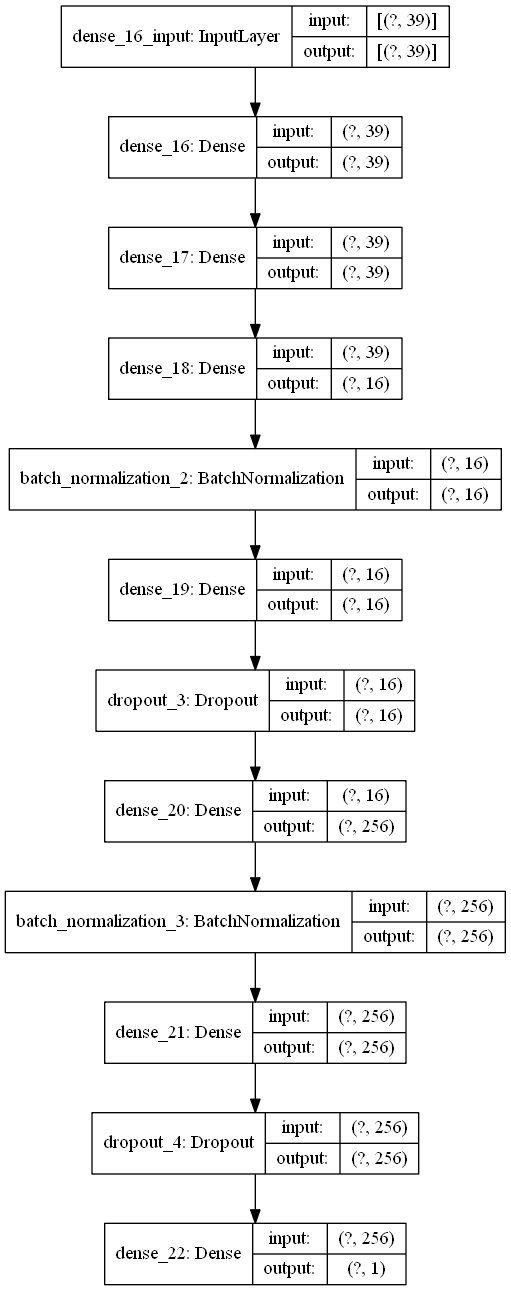

In [35]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 39)                1560      
_________________________________________________________________
dense_17 (Dense)             (None, 39)                1560      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                640       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)              

In [ ]:
model.fit()